Code to import and clean the Criteo uplift data.

Download the data here: https://drive.google.com/file/d/1PQSUWEyu7RJMkh2vVWi8uHWTKGWIunpV/view

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("../../Data/Criteo/criteo-research-uplift-v2.1.csv.gz", 
                 compression='gzip', 
                 sep='\,',
                 header=0)

print(df.head())

C:\Users\camer\AppData\Local\Temp\ipykernel_28544\2088825034.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("../../Data/Criteo/criteo-research-uplift-v2.1.csv.gz",


          f0         f1        f2        f3         f4        f5        f6  \
0  12.616365  10.059654  8.976429  4.679882  10.280525  4.115453  0.294443   
1  12.616365  10.059654  9.002689  4.679882  10.280525  4.115453  0.294443   
2  12.616365  10.059654  8.964775  4.679882  10.280525  4.115453  0.294443   
3  12.616365  10.059654  9.002801  4.679882  10.280525  4.115453  0.294443   
4  12.616365  10.059654  9.037999  4.679882  10.280525  4.115453  0.294443   

         f7        f8         f9       f10       f11  treatment  conversion  \
0  4.833815  3.955396  13.190056  5.300375 -0.168679          1           0   
1  4.833815  3.955396  13.190056  5.300375 -0.168679          1           0   
2  4.833815  3.955396  13.190056  5.300375 -0.168679          1           0   
3  4.833815  3.955396  13.190056  5.300375 -0.168679          1           0   
4  4.833815  3.955396  13.190056  5.300375 -0.168679          1           0   

   visit  exposure  
0      0         0  
1      0      

View some of the data.

In [2]:
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979587,26.297764,10.059654,9.006250,4.679882,10.280525,4.115453,-3.282109,4.833815,3.839578,13.190056,5.300375,-0.168679,1,0,0,0
13979588,12.642207,10.679513,8.214383,-1.700105,10.280525,3.013064,-13.955150,6.269026,3.971858,13.190056,5.300375,-0.168679,1,0,0,1
13979589,12.976557,10.059654,8.381868,0.842442,11.029584,4.115453,-8.281971,4.833815,3.779212,23.570168,6.169187,-0.168679,1,0,1,0
13979590,24.805064,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0


Some summary statistics.

In [3]:
# calculate summary statistics for the dataset
print(df.describe())


                 f0            f1            f2            f3            f4  \
count  1.397959e+07  1.397959e+07  1.397959e+07  1.397959e+07  1.397959e+07   
mean   1.962030e+01  1.006998e+01  8.446582e+00  4.178923e+00  1.033884e+01   
std    5.377464e+00  1.047557e-01  2.993161e-01  1.336645e+00  3.433081e-01   
min    1.261636e+01  1.005965e+01  8.214383e+00 -8.398387e+00  1.028053e+01   
25%    1.261636e+01  1.005965e+01  8.214383e+00  4.679882e+00  1.028053e+01   
50%    2.192341e+01  1.005965e+01  8.214383e+00  4.679882e+00  1.028053e+01   
75%    2.443646e+01  1.005965e+01  8.723335e+00  4.679882e+00  1.028053e+01   
max    2.674526e+01  1.634419e+01  9.051962e+00  4.679882e+00  2.112351e+01   

                 f5            f6            f7            f8            f9  \
count  1.397959e+07  1.397959e+07  1.397959e+07  1.397959e+07  1.397959e+07   
mean   4.028513e+00 -4.155356e+00  5.101765e+00  3.933581e+00  1.602764e+01   
std    4.310974e-01  4.577914e+00  1.205248e+00  5.

Are there any missing values?

In [4]:
# count the number of missing values in each column
print(df.isnull().sum())


f0            0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
treatment     0
conversion    0
visit         0
exposure      0
dtype: int64


The data seems pretty clean already. We also don't know what the features f0-f11 are, so we don't know if there are any unrealistic values to exclude. We'll assume the values are all correct.

Let's see how many unique values each feature has. This will help us decide what model to use for synthesizing each feature.

In [5]:
# compute number of unique values for each feature
print(df.nunique())

f0            2181959
f1                 60
f2            2051900
f3                552
f4                260
f5                132
f6               1645
f7             622143
f8               3743
f9               1594
f10            517372
f11               136
treatment           2
conversion          2
visit               2
exposure            2
dtype: int64


Features f0-f11 are numeric features, treatment is a binary variable, conversion is a binary variable, visit is a binary variable, and exposure is a binary variable. We will attempt to use the GMM to synthesize f0-f11 and use multinomial synthesizers for the other variables.

Create kernel density plots for features f0-f11.

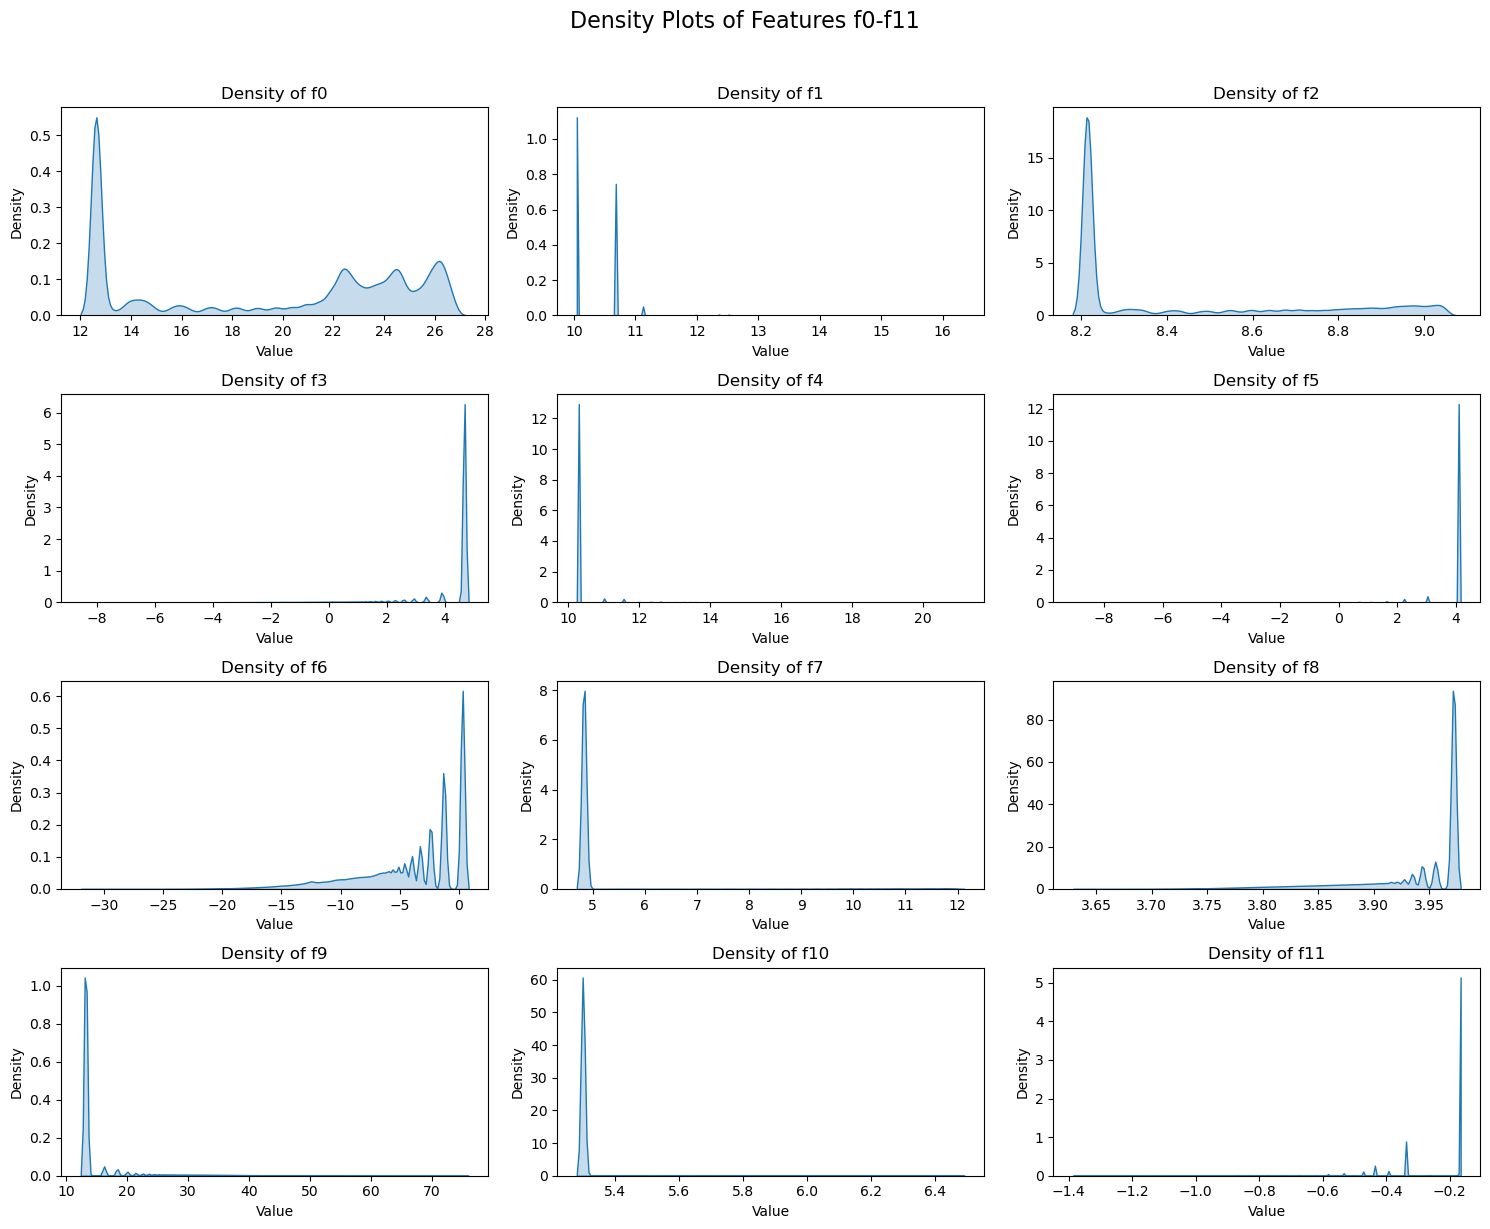

In [6]:
# create density plots of variables f0-f11

plot_data = df[['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11']]

# Create a 4x3 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Density Plots of Features f0-f11', fontsize=16, y=1.02)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each feature's density
for ax, (feature, values) in zip(axes, plot_data.items()):
    sns.kdeplot(data=values, ax=ax, fill=True)
    ax.set_title(f'Density of {feature}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
# plt.savefig('density_plots.png', dpi=300)
plt.show()

All of these features are multimodal, and some are heavily skewed.

- Right skewed: f0, f1, f2, f4, f7, f9, f10
- Left skewed: f3, f5, f6, f8, f11

GMMs can handle multimodality, we can try to address the skew. We'll do a simple `log` transformation for right skew and `exp` for left skew.

In [7]:
def correct_skew(df, right_skewed_features, left_skewed_features):
    """
    Apply log and exponential transformations to correct skewness in specified features.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The input dataframe containing the features to be transformed
    right_skewed_features : list of str
        List of feature names that are right-skewed
    left_skewed_features : list of str
        List of feature names that are left-skewed
    
    Returns:
    --------
    pd.DataFrame
        DataFrame with transformed features
    """
    df_transformed = df.copy()
    
    # Handle right-skewed features with log transformation
    for feature in right_skewed_features:
        if feature not in df.columns:
            print(f"Warning: Feature '{feature}' not found in dataframe")
            continue
            
        # Add small constant to handle zeros/negatives
        min_val = df[feature].min()
        if min_val <= 0:
            df_transformed[feature] = df[feature] + (1 - min_val)
        
        # Apply log transformation
        df_transformed[feature] = np.log(df_transformed[feature])
    
    # Handle left-skewed features with exponential transformation
    for feature in left_skewed_features:
        if feature not in df.columns:
            print(f"Warning: Feature '{feature}' not found in dataframe")
            continue
            
        # Apply exponential transformation directly
        df_transformed[feature] = np.exp(df[feature])
    
    return df_transformed

In [8]:
df_transformed = correct_skew(df,
                              right_skewed_features=['f0', 'f1', 'f2', 'f4', 'f7', 'f9', 'f10'], 
                              left_skewed_features=['f3', 'f5', 'f6', 'f8', 'f11'])

KeyboardInterrupt: 

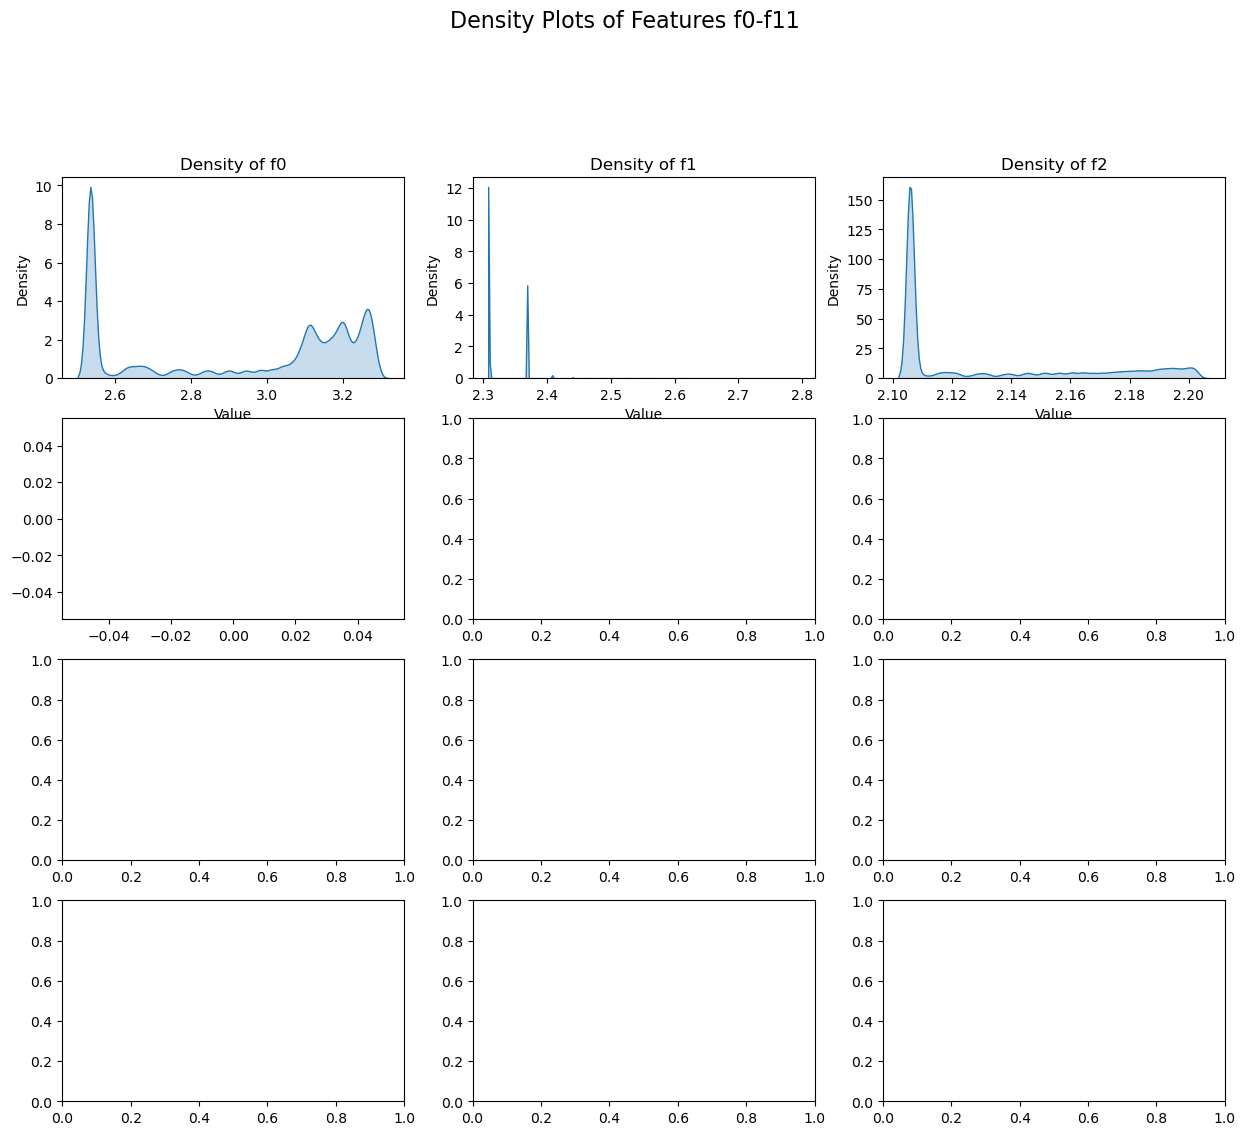

In [9]:
# create density plots of transformed variables f0-f11

plot_data = df_transformed[['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11']]

# Create a 4x3 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Density Plots of Features f0-f11', fontsize=16, y=1.02)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each feature's density
for ax, (feature, values) in zip(axes, plot_data.items()):
    sns.kdeplot(data=values, ax=ax, fill=True)
    ax.set_title(f'Density of {feature}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
# plt.savefig('density_plots.png', dpi=300)
plt.show()

Most of the distributions still look pretty rough. We could try a box-cox transformation, but we'll stick with the log and exp transformations for now.

Save the transformed data to a new file. This data will be treated as the confidential data. We'll synthesize it in another file.

In [10]:
df_transformed

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,2.534995,2.308533,2.194602,107.757316,2.330251,61.279994,1.342378e+00,1.575636,52.216366,2.579463,1.667778,0.84478,1,0,0,0
1,2.534995,2.308533,2.197523,107.757316,2.330251,61.279994,1.342378e+00,1.575636,52.216366,2.579463,1.667778,0.84478,1,0,0,0
2,2.534995,2.308533,2.193303,107.757316,2.330251,61.279994,1.342378e+00,1.575636,52.216366,2.579463,1.667778,0.84478,1,0,0,0
3,2.534995,2.308533,2.197536,107.757316,2.330251,61.279994,1.342378e+00,1.575636,52.216366,2.579463,1.667778,0.84478,1,0,0,0
4,2.534995,2.308533,2.201438,107.757316,2.330251,61.279994,1.342378e+00,1.575636,52.216366,2.579463,1.667778,0.84478,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979587,3.269484,2.308533,2.197919,107.757316,2.330251,61.279994,3.754896e-02,1.575636,46.505852,2.579463,1.667778,0.84478,1,0,0,0
13979588,2.537041,2.368327,2.105887,0.182664,2.330251,20.349663,8.696717e-07,1.835621,53.083067,2.579463,1.667778,0.84478,1,0,0,1
13979589,2.563144,2.308533,2.126071,2.322030,2.400581,61.279994,2.530380e-04,1.575636,43.781534,3.159982,1.819567,0.84478,1,0,1,0
13979590,3.211048,2.308533,2.105887,107.757316,2.330251,61.279994,2.757648e-01,1.575636,53.083067,2.579463,1.667778,0.84478,1,0,0,0


In [11]:
# save a small version for testing
df_small, _ = train_test_split(df_transformed, train_size = 100000, stratify = df_transformed['conversion'])

df_small.to_csv("../../Data/Criteo/cleaned_criteo_small.gz", index=False, compression="gzip")
# save the full version
df_transformed.to_csv("../../Data/Criteo/cleaned_criteo.gz", index=False, compression="gzip")